<a id="contents"></a>

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Анализ-воронки-событий" data-toc-modified-id="Анализ-воронки-событий-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ воронки событий</a></span></li><li><span><a href="#Анализ-результатов-A/A/B---эксперимента" data-toc-modified-id="Анализ-результатов-A/A/B---эксперимента-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ результатов A/A/B - эксперимента</a></span><ul class="toc-item"><li><span><a href="#Сравнение-двух-контрольных-групп" data-toc-modified-id="Сравнение-двух-контрольных-групп-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Сравнение двух контрольных групп</a></span></li><li><span><a href="#Сравнение-тестовой-группы-с-контрольными-группами" data-toc-modified-id="Сравнение-тестовой-группы-с-контрольными-группами-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Сравнение тестовой группы с контрольными группами</a></span><ul class="toc-item"><li><span><a href="#Сравнение-тестовой-группы-248-с-контрольной-группой-246" data-toc-modified-id="Сравнение-тестовой-группы-248-с-контрольной-группой-246-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Сравнение тестовой группы 248 с контрольной группой 246</a></span></li><li><span><a href="#Сравнение-тестовой-группы-248-с-контрольной-группой-247" data-toc-modified-id="Сравнение-тестовой-группы-248-с-контрольной-группой-247-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Сравнение тестовой группы 248 с контрольной группой 247</a></span></li></ul></li><li><span><a href="#Сравнение-тестовой-группы-с-объединенной-контрольной-группой" data-toc-modified-id="Сравнение-тестовой-группы-с-объединенной-контрольной-группой-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Сравнение тестовой группы с объединенной контрольной группой</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Анализ поведения пользователей мобильного приложения

## Описание проекта
В данном проекте мы анализируем поведение пользователей мобильного приложения по продаже продуктов питания. Узнаем, как пользователи доходят до покупки, исследуя воронку продаж. Затем исследуем результаты A/A/B-эксперимента по изменению шрифта, чтобы выяснить, какой шрифт лучше.

Данные представлены в файле с логами пользователей **logs_exp.csv** со следующими полями:

- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

## Изучение общей информации

In [86]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

In [2]:
# загружаем файлы
# path = '/datasets/' #путь яндекса
# df = pd.read_csv(path + 'logs_exp.csv', sep='\s', engine='python') 

# мой путь
df = pd.read_csv('logs_exp.csv', sep='\s', engine='python')

In [3]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
# выведем информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
# посмотрим на имеющиеся столбцы
df.columns

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')

Пропусков в данных нет. Типы данных в столбцах указаны верно. Нужно превратить столбец с временем события (EventTimestamp) в привычный формат даты и времени. Также необходимо откорректировать названия столбцов и проверить на дубликаты.

In [6]:
# посчитаем количество строк в каждом уникальном событии 
df['EventName'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64

Имеется 5 событий.

<a href="#contents">к оглавлению</a>

## Предобработка данных

In [7]:
# поменяем названия столбцов
df=df.rename(columns={'EventName': 'event', 'DeviceIDHash': 'user_id', 'EventTimestamp': 'event_timestamp', \
                   'ExpId': 'exp_id'})

In [8]:
# добавим столбец с датой и временем в привычном виде, преобразовав столбец с временем события 
df['event_datetime'] = df['event_timestamp'].apply(datetime.datetime.fromtimestamp)

In [9]:
# выделим дату в отдельный столбец
df['event_date']=df['event_datetime'].dt.date

In [10]:
# поменяем тип данных в event_date на формат даты
df['event_date']=pd.to_datetime(df['event_date'])

In [11]:
# столбцы с датой и временем добавлены
df.head()

,event,user_id,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 10:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 17:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 17:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 17:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 17:48:42,2019-07-25


In [12]:
# проверим на дубликаты
df.duplicated().sum()

413

In [13]:
# сохраним дубликаты в таблицу
dupl=df[df.duplicated()]['event']

In [14]:
# сохраним в список уникальные события, у которых есть дубликаты 
temp_dupl=list(dupl.unique())

In [15]:
# создадим таблицу из списка дубликатов
pd.DataFrame(data={'event':temp_dupl})

,event
0,MainScreenAppear
1,CartScreenAppear
2,PaymentScreenSuccessful
3,OffersScreenAppear
4,Tutorial


Все 5 событий имеют дубликаты.

In [16]:
# посчитаем сколько дубликатов у каждого события из списка дубликатов, где столбец event_timestamp это подсчет
df[df.duplicated(keep=False)].\
groupby(['event', 'user_id', 'exp_id', 'event_datetime', 'event_date'])[['event_timestamp']]\
.count().sort_values('event_timestamp', ascending=False).head(15)

event_timestamp
event                   user_id             exp_id event_datetime      event_date                 
Tutorial                3473691793382022823 248    2019-08-02 04:11:49 2019-08-02                5
PaymentScreenSuccessful 4980045449118619005 247    2019-08-01 19:20:40 2019-08-01                5
Tutorial                3473691793382022823 248    2019-08-02 04:11:53 2019-08-02                5
PaymentScreenSuccessful 636437379427729086  247    2019-08-02 12:10:06 2019-08-02                5
                                                   2019-08-02 12:10:05 2019-08-02                4
                        7757756163339431950 247    2019-08-04 00:37:09 2019-08-04                4
                        6932517045703054087 248    2019-08-05 23:00:03 2019-08-05                4
                        6342256201668992826 246    2019-08-03 18:40:14 2019-08-03                4
Tutorial                3473691793382022823 248    2019-08-02 04:11:52 2019-08-02                4
                        5767286434014984014 246    2019-08-05 17:25:52 2019-08-05                4
                        3473691793382022823 248    2019-08-02 04:14:08 2019-08-02                4
PaymentScreenSuccessful 4948674310025878773 246    2019-08-05 01:34:36 2019-08-05                4
                        3528217211962170139 247    2019-08-01 17:13:23 2019-08-01                4
                        4980045449118619005 247    2019-08-01 19:20:39 2019-08-01                4
                        6394616444764198947 246    2019-08-04 04:03:10 2019-08-04                3

Каждое событие имеет по несколько дубликатов, причем по многим пользователям. Пока не будем удалять эти дубликаты, учитывая, что мы будем считать конверсию по уникальным пользователям. Стоит уточнить информацию у коллег.

<a href="#contents">к оглавлению</a>

## Анализ данных

In [17]:
# посчитаем события в логе
df['event'].nunique()

5

В логе есть 5 событий.

In [18]:
# посчитаем, сколько всего пользователей в логе
df['user_id'].nunique()

7551

Имеется 7551 уникальный пользователь.

In [19]:
# выясним, сколько в среднем событий приходится на пользователя
np.round(df.groupby('user_id')['event'].count().mean(), 2)

32.33

In [20]:
# выясним, сколько в среднем уникальных событий приходится на пользователя
np.round(df.groupby('user_id')['event'].nunique().mean(), 2)

2.67

В среднем, на пользователя приходится 32 события, и 2 уникальных события.

Проверим период данных и распределение по дате и времени.

In [21]:
# проверка стартовой и последней даты в данных
df['event_date'].min(), df['event_date'].max()

(Timestamp('2019-07-25 00:00:00'), Timestamp('2019-08-08 00:00:00'))

У нас есть данные с 25 июля 2019 по 7 августа 2019.

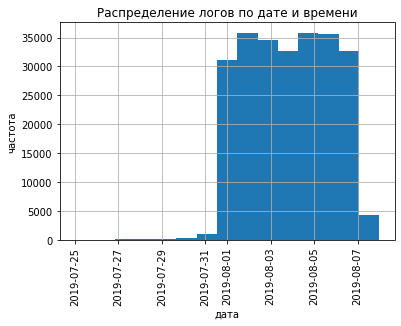

In [22]:
# построим гистограмму по дате и времени
df['event_date'].hist(bins=15)
plt.xticks(rotation=90)
plt.title('Распределение логов по дате и времени')
plt.xlabel('дата')
plt.ylabel('частота')
plt.show()

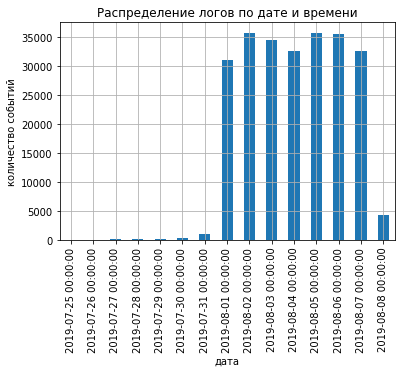

In [23]:
# построим также столбчатую диаграмму по дате и времени
df.groupby('event_date')['event'].count().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Распределение логов по дате и времени')
plt.xlabel('дата')
plt.ylabel('количество событий')
plt.grid()
plt.show()

Количество логов значительно больше начиная с 1 августа 2019. Можно отбросить данные до 1 августа.

In [24]:
# всего наблюдений в данных
len(df)

244126

In [25]:
# кол-во наблюдений с 1 августа
len(df.query('event_date > "2019-07-31"'))

242363

In [26]:
# кол-во наблюдений до 1 августа
len(df.query('event_date < "2019-08-01"'))

1763

Отбросив данные до 1 августа мы потеряем 1% данных, что вполне допустимо.

In [27]:
# сохраним новый набор данных с 1 вгуста в таблице
df_new=df.query('event_date > "2019-07-31"')
df_new.head()

,event,user_id,event_timestamp,exp_id,event_datetime,event_date
1763,CartScreenAppear,6691132494257042276,1564596006,248,2019-08-01 00:00:06,2019-08-01
1764,PaymentScreenSuccessful,6691132494257042276,1564596006,248,2019-08-01 00:00:06,2019-08-01
1765,MainScreenAppear,7306852973078029735,1564596076,248,2019-08-01 00:01:16,2019-08-01
1766,MainScreenAppear,6980079826054751204,1564596088,246,2019-08-01 00:01:28,2019-08-01
1767,OffersScreenAppear,4980045449118619005,1564596129,247,2019-08-01 00:02:09,2019-08-01


In [28]:
# создаем кортеж из id пользователей в новом датасете
new_user_tuple=tuple(list(df_new['user_id'].values))             

In [29]:
# кол-во пользователей в исходных данных, которые не вошли в новый датасет
df.query('user_id not in @new_user_tuple')['user_id'].nunique()

12

Видим, что 17 пользователей не вошли в новый датасет. Это составляет 0.2% (17/7551) от всех уникальных пользователей в исходных данных.

In [30]:
# отфильтруем дату до 1 августа
df = df.query('event_date > "2019-07-31"')

In [31]:
# проверим период данных
df['event_date'].min(), df['event_date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-08 00:00:00'))

In [32]:
# проверим присутствие 3-х групп эксперимента
df['exp_id'].value_counts()

248    85113
246    79755
247    77495
Name: exp_id, dtype: int64

После удаления старых данных пользователи из всех трёх экспериментальных групп по-прежнему представлены в данных.

## Анализ воронки событий

Посмотрим, какие события есть в логах, как часто они встречаются.

In [33]:
# посчитаем количество логов в каждом событии 
df['event'].value_counts().rename_axis('event').reset_index(name='count')

,event,count
0,MainScreenAppear,118108
1,OffersScreenAppear,46594
2,CartScreenAppear,42446
3,PaymentScreenSuccessful,34171
4,Tutorial,1044


В логе есть 5 событий в нисходящем порядке по частоте: 
* 1) главная страница;
* 2) страница с предложениями;
* 3) страница с корзиной;
* 4) страница с успешным платежом;
* 5) страница с инструкцией, обучающим видео либо помощью.

Посчитаем, сколько пользователей совершали каждое из этих событий, а также долю пользователей, которые хоть раз совершали событие.

In [34]:
# посчитаем кол-во уникальных пользователей на каждом шаге
funnel = df.groupby('event')[['user_id']].nunique().reset_index()\
.sort_values(by='user_id', ascending=False)
funnel

,event,user_id
1,MainScreenAppear,7424
2,OffersScreenAppear,4600
0,CartScreenAppear,3736
3,PaymentScreenSuccessful,3540
4,Tutorial,843


In [35]:
# общее количество уникальных пользователей в наших данных 
total_users = df['user_id'].nunique()
total_users 

7539

In [36]:
# посчитаем долю пользователей, которые хоть раз совершали событие
funnel['users_share'] = np.round(funnel['user_id']/total_users, 2)
funnel

,event,user_id,users_share
1,MainScreenAppear,7424,0.98
2,OffersScreenAppear,4600,0.61
0,CartScreenAppear,3736,0.50
3,PaymentScreenSuccessful,3540,0.47
4,Tutorial,843,0.11


In [37]:
# модифицируем немного воронку
funnel_1 = funnel.append({'event' : 'Total', 'user_id' : 7542, 'users_share' : 1,}, ignore_index=True)
funnel_1 = funnel_1.drop(4).sort_values(by='user_id', ascending=False)
funnel_1

,event,user_id,users_share
5,Total,7542,1.00
0,MainScreenAppear,7424,0.98
1,OffersScreenAppear,4600,0.61
2,CartScreenAppear,3736,0.50
3,PaymentScreenSuccessful,3540,0.47


In [87]:
# построим график - воронку продаж 
fig = go.Figure()
fig.add_trace(go.Funnel(
y = list(funnel_1['event'].values),
x = list(funnel_1['user_id'].values), textinfo = "value+percent initial"))
fig.update_layout(title_text='Воронка продаж', title_font_size=20)
iplot(fig)

Получили воронку: число уникальных пользователей уменьшается сверху вниз. Базовая конверсия в покупки - 47%. Последовательность событий выглядит логичной, кроме события Tutorial, которое можно исключить из воронки, так как оно может произойти в любой последовательности.

Также построим воронку продаж в разбивке по группам эксперимента для наглядности.

In [39]:
# общее кол-во уникальных пользователей в каждой группе экперимента
df.groupby('exp_id')['user_id'].nunique()

exp_id
246    2484
247    2517
248    2538
Name: user_id, dtype: int64

In [40]:
# создадим таблицу с кол-вом уникальных пользователей с группировкой по событию и по группе экперимента
funnel_multi=df.groupby(['event', 'exp_id'])[['user_id']].nunique().drop('Tutorial').reset_index()\
.append(pd.DataFrame([['Total', 246, 2484], ['Total', 247, 2513], ['Total', 248, 2537]], \
columns=['event', 'exp_id', 'user_id']), ignore_index=True).sort_values(by='user_id', ascending=False)
funnel_multi

,event,exp_id,user_id
14,Total,248,2537
13,Total,247,2513
5,MainScreenAppear,248,2495
12,Total,246,2484
4,MainScreenAppear,247,2479
3,MainScreenAppear,246,2450
6,OffersScreenAppear,246,1542
8,OffersScreenAppear,248,1533
7,OffersScreenAppear,247,1525
0,CartScreenAppear,246,1266


In [89]:
# построим график - воронку продаж в разбивке по группе эксперимента - 246, 247 и 248
fig = go.Figure()

fig.add_trace(go.Funnel(
name='group 246',
y = list(funnel_multi.query('exp_id==246')['event'].values),
x = list(funnel_multi.query('exp_id==246')['user_id'].values), 
textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
name = 'group 247',
orientation = "h",
y = list(funnel_multi.query('exp_id==247')['event'].values),
x = list(funnel_multi.query('exp_id==247')['user_id'].values),
textposition = "inside",
textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
name = 'group 248',
orientation = "h",
y = list(funnel_multi.query('exp_id==248')['event'].values),
x = list(funnel_multi.query('exp_id==248')['user_id'].values),
textposition = "inside",
textinfo = "value+percent initial"))

fig.update_layout(title_text='Воронка продаж по группам эксперимента', title_font_size=20)
iplot(fig)

Из воронки видно, что наибольшая конверсия в покупку в группе номер 246 - контрольной группе.

In [42]:
# удалим строку с событием Tutorial
funnel=funnel.drop(4)
funnel

,event,user_id,users_share
1,MainScreenAppear,7424,0.98
2,OffersScreenAppear,4600,0.61
0,CartScreenAppear,3736,0.50
3,PaymentScreenSuccessful,3540,0.47


По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки от числа пользователей на
предыдущем шаге.

In [43]:
funnel['shift'] = funnel['user_id'].shift(periods=1) 
funnel

,event,user_id,users_share,shift
1,MainScreenAppear,7424,0.98,NaN
2,OffersScreenAppear,4600,0.61,7424.0
0,CartScreenAppear,3736,0.50,4600.0
3,PaymentScreenSuccessful,3540,0.47,3736.0


In [44]:
# доля пользователей, проходящих на следующий шаг от предыдущего - retention
# доля пользователей, проходящих на следующий шаг от первого шага - retention_first_event
funnel['retention'] = np.round(funnel['user_id']/funnel['shift'], 2)
funnel['retention_first_event'] = np.round(funnel['user_id']/funnel.loc[1, 'user_id'], 2)
funnel

,event,user_id,users_share,shift,retention,retention_first_event
1,MainScreenAppear,7424,0.98,NaN,NaN,1.00
2,OffersScreenAppear,4600,0.61,7424.0,0.62,0.62
0,CartScreenAppear,3736,0.50,4600.0,0.81,0.50
3,PaymentScreenSuccessful,3540,0.47,3736.0,0.95,0.48


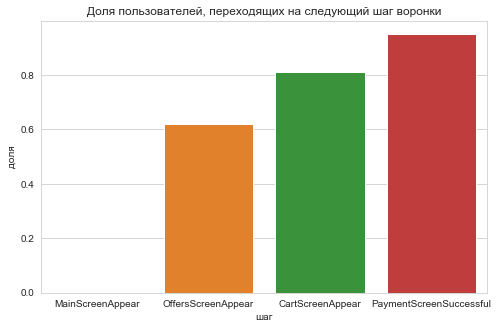

In [45]:
# график для  - доля пользователей, проходящих на следующий шаг от предыдущего
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.barplot(x='event', y='retention', data=funnel)
plt.title('Доля пользователей, переходящих на следующий шаг воронки')
plt.xlabel('шаг')
plt.ylabel('доля')
plt.show()

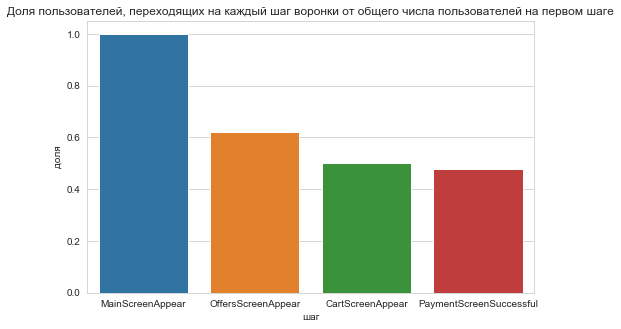

In [46]:
# график для - доля пользователей, проходящих на следующий шаг от первого шага
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.barplot(x='event', y='retention_first_event', data=funnel)
plt.title('Доля пользователей, переходящих на каждый шаг воронки от общего числа пользователей на первом шаге')
plt.xlabel('шаг')
plt.ylabel('доля')
plt.show()

На втором шаге - OffersscreenAppear - теряем больше всего пользователей.
Если отталкиваться от количества пользователей на первом шаге, то видим, что 48% пользователей доходит до оплаты.

<a href="#contents">к оглавлению</a>

## Анализ результатов A/A/B - эксперимента

### Сравнение двух контрольных групп

У нас есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между A/A выборками 246 и 247.

In [47]:
# кол-во пользователей в каждой группе
df.groupby('exp_id')['user_id'].nunique().reset_index().rename(columns={'user_id': 'uniq_users_count'})

,exp_id,uniq_users_count
0,246,2484
1,247,2517
2,248,2538


Видим примерно одинаковое количество участников в каждой группе.

In [48]:
# воронка для группы под номером 246
funnel_246=df.query('exp_id ==246').groupby('event')[['user_id']].nunique().reset_index()\
.sort_values(by='user_id', ascending=False).drop(4).rename(columns={'user_id': 'users_count'})
funnel_246

,event,users_count
1,MainScreenAppear,2450
2,OffersScreenAppear,1542
0,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


In [49]:
# общее кол-во посетителей в группе 246
total_users_246 = df.query('exp_id ==246')['user_id'].nunique()
total_users_246

2484

In [50]:
# воронка для группы под номером 247
funnel_247=df.query('exp_id ==247').groupby('event')[['user_id']].nunique().reset_index()\
.sort_values(by='user_id', ascending=False).drop(4).rename(columns={'user_id': 'users_count'})
funnel_247

,event,users_count
1,MainScreenAppear,2479
2,OffersScreenAppear,1525
0,CartScreenAppear,1239
3,PaymentScreenSuccessful,1158


In [51]:
# общее кол-во посетителей в группе под номером 247
total_users_247 = df.query('exp_id ==247')['user_id'].nunique()
total_users_247

2517

In [52]:
# # объединим две таблицы, отобразив количество пользователей на последнем шаге
funnel_a_a=funnel_246.merge(funnel_247, left_on='event', right_on='event', suffixes=('_246', '_247')).drop([0,1,2])
funnel_a_a

,event,users_count_246,users_count_247
3,PaymentScreenSuccessful,1200,1158


In [53]:
df2 = pd.DataFrame([['total_users', total_users_246, total_users_247]], \
                   columns=['event', 'users_count_246', 'users_count_247'])

In [54]:
# объединим таблицу с данными по общему количеству
funnel_a_a=pd.concat([funnel_a_a, df2]).pivot_table(columns='event', values=['users_count_246','users_count_247'])\
.reset_index().rename(columns={'index': 'group', 'PaymentScreenSuccessful':'payers', 'total_users':'users'})
funnel_a_a

event,group,payers,users
0,users_count_246,1200,2484
1,users_count_247,1158,2517


In [55]:
# посчитаем конверсию в покупку
funnel_a_a['conv']=(funnel_a_a['payers']/funnel_a_a['users']).round(2)
funnel_a_a.reset_index(drop=True)

event,group,payers,users,conv
0,users_count_246,1200,2484,0.48
1,users_count_247,1158,2517,0.46


Видим, что конверсия в группе 247 ниже.

Сравним конверсии в двух A/A выбрках посредством z-теста. Сформулируем нулевую и альтернативную гипотезу.

* $H_0$: Между группами A(246) и A(247) нет различий в % конверсии в покупку;
* $H_1$: Между группами A(246) и A(247) есть различие % конверсии в покупку.

In [56]:
# уровень статистической значимости
alpha=0.05

# корректируем alpha на 4, так как сравниваем конверсии на каждом шаге воронки, а шагов у нас 4 - это значит 4 гипотезы
alpha=alpha / 4

# список с количеством покупателей
count = list(funnel_a_a['payers'].values)

# список с количеством пользователей
nobs = list(funnel_a_a['users'].values)

# тест на различие в пропорциях, то есть в нашем случае - конверсиях
pvalue = proportions_ztest(count, nobs, value = 0)[1]
print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: между группами A(246) и A(247) нет различий в % конверсии в покупку.')
else:
    print('Нулевая гипотеза отвергается: между группами A(246) и A(247) есть различие % конверсии в покупку.')

p-value: 0.10298394982948818
Нулевая гипотеза не отвергается: между группами A(246) и A(247) нет различий в % конверсии в покупку.


Тест показывает, что нет статистически значимых различий в конверсии между группами A/A.

Теперь посчитаем конверсию на каждом шаге для двух контрольных групп, и проверим, будет ли отличие между группами статистически достоверным. 

In [57]:
# посчитаем долю пользователей в группе 246, которые совершали событие
funnel_246['users_share'] = (funnel_246['users_count']/total_users_246).round(2)
funnel_246

,event,users_count,users_share
1,MainScreenAppear,2450,0.99
2,OffersScreenAppear,1542,0.62
0,CartScreenAppear,1266,0.51
3,PaymentScreenSuccessful,1200,0.48


In [58]:
# посчитаем долю пользователей в группе 246, которые совершали событие
funnel_247['users_share'] = (funnel_247['users_count']/total_users_247).round(2)
funnel_247

,event,users_count,users_share
1,MainScreenAppear,2479,0.98
2,OffersScreenAppear,1525,0.61
0,CartScreenAppear,1239,0.49
3,PaymentScreenSuccessful,1158,0.46


Группа 247 ниже по всем показателям конверсии на каждом шаге воронки. 

Проверим значимо ли это различие статистически.

In [59]:
# объединим две таблицы, отобразив количество пользователей на каждом шаге, кроме последнего
funnel_a_a_2=funnel_246.merge(funnel_247, left_on='event', right_on='event', suffixes=('_246', '_247')).drop([3])
funnel_a_a_2

,event,users_count_246,users_share_246,users_count_247,users_share_247
0,MainScreenAppear,2450,0.99,2479,0.98
1,OffersScreenAppear,1542,0.62,1525,0.61
2,CartScreenAppear,1266,0.51,1239,0.49


In [60]:
# добавим столбец с общим количеством пользователей в группе 246
funnel_a_a_2['total_246']=total_users_246

In [61]:
# добавим столбец с общим количеством пользователей в группе 247
funnel_a_a_2['total_247']=total_users_247

In [62]:
# объединенная таблица
funnel_a_a_2

,event,users_count_246,users_share_246,users_count_247,users_share_247,total_246,total_247
0,MainScreenAppear,2450,0.99,2479,0.98,2484,2517
1,OffersScreenAppear,1542,0.62,1525,0.61,2484,2517
2,CartScreenAppear,1266,0.51,1239,0.49,2484,2517


Получили таблицу с событием и количеством пользователей в каждой группе.

In [63]:
# список с количеством пользователей в 1 шаге 
count_step_1 = list(funnel_a_a_2.iloc[0, [1,3]].values)
count_step_1

[2450, 2479]

In [64]:
# список с количеством пользователей во 2-м шаге 
count_step_2 = list(funnel_a_a_2.iloc[1, [1,3]].values)
count_step_2

[1542, 1525]

In [65]:
# список с количеством пользователей во 3-м шаге 
count_step_3 = list(funnel_a_a_2.iloc[2, [1,3]].values)
count_step_3

[1266, 1239]

In [66]:
# общее кол-во пользователей в каждой группе
nobs_2_groups=list(funnel_a_a_2.iloc[0, [5,6]].values)
nobs_2_groups

[2484, 2517]

In [67]:
# проведем z-тест для 3-х шагов воронки: MainScreenAppear, OffersScreenAppear, CartScreenAppea

# уровень статистической значимости
alpha=0.05

# корректируем alpha на 4, так как сравниваем конверсии на каждом шаге воронки, а шагов у нас 4 - это значит 4 гипотезы
alpha=alpha / 4

list_count=[count_step_1, count_step_2, count_step_3]

for i in list_count:
    pvalue = proportions_ztest(i, nobs_2_groups, value = 0)[1]
    print('p-value: {}'.format(pvalue))
    if pvalue >= alpha: 
        print('Нулевая гипотеза не отвергается: между группами A(246) и A(247) нет различий в % конверсии.')
    else:
        print('Нулевая гипотеза отвергается: между группами A(246) и A(247) есть различие % конверсии.')

p-value: 0.6756217702005545
Нулевая гипотеза не отвергается: между группами A(246) и A(247) нет различий в % конверсии.
p-value: 0.2795695759951239
Нулевая гипотеза не отвергается: между группами A(246) и A(247) нет различий в % конверсии.
p-value: 0.2182812140633792
Нулевая гипотеза не отвергается: между группами A(246) и A(247) нет различий в % конверсии.


Различие в конверсиях на каждом шаге между двумя контрольными группами статистически не значимо. Это значит, что разбиение на группы работает корректно.

<a href="#contents">к оглавлению</a>

### Сравнение тестовой группы с контрольными группами

Сравним тестовую группу с контрольными группами по каждому событию. Для начала подготовим объединенную таблицу с показателями конверсии.

In [68]:
# воронка для тестовой группы под номером 248 
funnel_248=df.query('exp_id ==248').groupby('event')[['user_id']].nunique().reset_index()\
.sort_values(by='user_id', ascending=False).drop(4).rename(columns={'user_id': 'users_count_248'})
funnel_248

,event,users_count_248
1,MainScreenAppear,2495
2,OffersScreenAppear,1533
0,CartScreenAppear,1231
3,PaymentScreenSuccessful,1182


In [69]:
# общее кол-во посетителей в тестовой группе 
total_users_248 = df.query('exp_id ==248')['user_id'].nunique()
total_users_248

2538

In [70]:
# посчитаем долю пользователей в тестовой группе, которые совершали событие
funnel_248['users_share_248'] = (funnel_248['users_count_248']/total_users_248).round(2)
funnel_248

,event,users_count_248,users_share_248
1,MainScreenAppear,2495,0.98
2,OffersScreenAppear,1533,0.60
0,CartScreenAppear,1231,0.49
3,PaymentScreenSuccessful,1182,0.47


In [71]:
# объединим две таблицы с контрольными группами
funnel_a_a_3=funnel_246.merge(funnel_247, left_on='event', right_on='event', suffixes=('_246', '_247'))
funnel_a_a_3

,event,users_count_246,users_share_246,users_count_247,users_share_247
0,MainScreenAppear,2450,0.99,2479,0.98
1,OffersScreenAppear,1542,0.62,1525,0.61
2,CartScreenAppear,1266,0.51,1239,0.49
3,PaymentScreenSuccessful,1200,0.48,1158,0.46


In [72]:
# объединим контрольные группы с тестовой
funnel_a_a_b = funnel_a_a_3.merge(funnel_248, left_on='event', right_on='event')
funnel_a_a_b

,event,users_count_246,users_share_246,users_count_247,users_share_247,users_count_248,users_share_248
0,MainScreenAppear,2450,0.99,2479,0.98,2495,0.98
1,OffersScreenAppear,1542,0.62,1525,0.61,1533,0.60
2,CartScreenAppear,1266,0.51,1239,0.49,1231,0.49
3,PaymentScreenSuccessful,1200,0.48,1158,0.46,1182,0.47


Видим, что конверсия тестовой группы ниже, чем контрольная группа 246 по всем шагам воронки. В сравнении с контрольной группой 247, тестовая группа ниже только по конверсии на 1-м шаге, и выше по конверсии в покупку, по остальным конверсям они одинаковы. Проведем z-тест, чтобы узнать значима ли разница статистически.

#### Сравнение тестовой группы 248 с контрольной группой 246
Сравним тестовую группу с контрольной группой 246 по каждому событию. Подготовим сначала списки с показателями для теста.

In [73]:
# список с количеством пользователей в 1 шаге для контрольной 246 и тестовой 248 группы
list_step_1 = list(funnel_a_a_b.iloc[0, [1,5]].values)

# список с количеством пользователей во 2-м шаге для контрольной 246 и тестовой 248 группы
list_step_2 = list(funnel_a_a_b.iloc[1, [1,5]].values)

# список с количеством пользователей в 3-м шаге для контрольной 246 и тестовой 248 группы
list_step_3 = list(funnel_a_a_b.iloc[2, [1,5]].values)

# список с количеством пользователей в 4-м шаге для контрольной 246 и тестовой 248 группы
list_step_4 = list(funnel_a_a_b.iloc[3, [1,5]].values)

# список со всеми парами аоказателей для каждого шага
list_all_steps=[list_step_1, list_step_2, list_step_3, list_step_4]

# общее кол-во пользователей в каждой группе
nobs_246_248=[total_users_246, total_users_248]

list_step_1, list_step_2, list_step_3, list_step_4, nobs_246_248

([2450, 2495], [1542, 1533], [1266, 1231], [1200, 1182], [2484, 2538])

Сформулируем нулевую и альтернативную гипотезу:
* $H_0$: Между группами A(246) и B(248) нет различий в % конверсии;
* $H_1$: Между группами A(246) и B(248) есть различие % конверсии.

In [74]:
# напишем функцию для проведения z-теста для сравнения пропорций/конверсий двух выборок
def prop_z_test(list_1, list_2):
    alpha=0.05
    
    # корректируем alpha на 4, так как сравниваем конверсии на каждом шаге воронки, а шагов у нас 4 - это значит 4 гипотезы
    alpha=alpha / 4 
    for i in list_1:
        pvalue = proportions_ztest(i, list_2, value = 0)[1]
        print('p-value: {}'.format(pvalue))
        if pvalue >= alpha: 
            print('Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.')
        else:
            print('Нулевая гипотеза отвергается: между контрольной и тестовой группами есть различие % конверсии.')

In [75]:
# передаем функции списки с показателями, которые мы уже подготовили 
prop_z_test(list_all_steps, nobs_246_248)

p-value: 0.34795275268482273
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.
p-value: 0.22308912539321446
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.
p-value: 0.08087021169127669
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.
p-value: 0.21774256549143867
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.


Тест не выявил статистически значимой разницы в конверсиях между тестовой группой 248 и контрольной группой 246 на каждом шаге воронки.

#### Сравнение тестовой группы 248 с контрольной группой 247
Сравним тестовую группу с контрольной группой 247 по каждому событию. Подготовим списки с показателями для теста.

In [76]:
# список с количеством пользователей в 1 шаге для контрольной 246 и тестовой 248 группы
list_step_1 = list(funnel_a_a_b.iloc[0, [3,5]].values)

# список с количеством пользователей во 2-м шаге для контрольной 246 и тестовой 248 группы
list_step_2 = list(funnel_a_a_b.iloc[1, [3,5]].values)

# список с количеством пользователей в 3-м шаге для контрольной 246 и тестовой 248 группы
list_step_3 = list(funnel_a_a_b.iloc[2, [3,5]].values)

# список с количеством пользователей в 4-м шаге для контрольной 246 и тестовой 248 группы
list_step_4 = list(funnel_a_a_b.iloc[3, [3,5]].values)

# список со всеми парами аоказателей для каждого шага
list_all_steps=[list_step_1, list_step_2, list_step_3, list_step_4]

# общее кол-во пользователей в каждой группе
nobs_247_248=[total_users_247, total_users_248]

list_step_1, list_step_2, list_step_3, list_step_4, nobs_247_248

([2479, 2495], [1525, 1533], [1239, 1231], [1158, 1182], [2517, 2538])

Сформулируем нулевую и альтернативную гипотезу:
* $H_0$: Между группами A(247) и B(248) нет различий в % конверсии;
* $H_1$: Между группами A(247) и B(248) есть различие % конверсии.

In [77]:
# передаем функции списки с показателями, которые мы уже подготовили 
prop_z_test(list_all_steps, nobs_247_248)

p-value: 0.6014103786219921
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.
p-value: 0.8923468682395976
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.
p-value: 0.6073760538276128
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.
p-value: 0.6871105516442813
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.


Тест не выявил статистически значимой разницы в конверсиях между тестовой группой 248 и контрольной группой 247 на каждом шаге воронки.

<a href="#contents">к оглавлению</a>

### Сравнение тестовой группы с объединенной контрольной группой

Сравним результаты тестовой группы с объединённой контрольной группой по каждому событию. 

Объединим две контрольные группы.

In [78]:
# воронка для объединенной контрольной группы
my_list=[246, 247]
funnel_control=df.query('exp_id in @my_list').groupby('event')[['user_id']].nunique().reset_index()\
.sort_values(by='user_id', ascending=False).drop(4).rename(columns={'user_id': 'users_count_control'})

In [79]:
# общее кол-во посетителей в в объединенной контрольной группе
total_users_control = df.query('exp_id in @my_list')['user_id'].nunique()
total_users_control

5001

In [80]:
# посчитаем долю пользователей в объединенной контрольной группе, которые совершали событие
funnel_control['users_share_control'] = (funnel_control['users_count_control']/total_users_control).round(2)
funnel_control

,event,users_count_control,users_share_control
1,MainScreenAppear,4929,0.99
2,OffersScreenAppear,3067,0.61
0,CartScreenAppear,2505,0.50
3,PaymentScreenSuccessful,2358,0.47


Создадим общую итоговую таблицу с вронкой продаж, добавив воронку для объединенной контрольной группы к нашей таблице

In [81]:
# объединим большую контрольную группу с нашей имеющейся таблицей-воронкой
funnel_complete = funnel_a_a_b.merge(funnel_control, left_on='event', right_on='event')
funnel_complete

,event,users_count_246,users_share_246,users_count_247,users_share_247,users_count_248,users_share_248,users_count_control,users_share_control
0,MainScreenAppear,2450,0.99,2479,0.98,2495,0.98,4929,0.99
1,OffersScreenAppear,1542,0.62,1525,0.61,1533,0.60,3067,0.61
2,CartScreenAppear,1266,0.51,1239,0.49,1231,0.49,2505,0.50
3,PaymentScreenSuccessful,1200,0.48,1158,0.46,1182,0.47,2358,0.47


Конверсия в обьединенной контрольной группе выше тестовой группы на каждом шаге. Проверим с помощью z-теста, значима ли разница статистически.

Сформулируем нулевую и альтернативную гипотезу:
* $H_0$: Между объединенной контрольной и тестовой группами нет различий в % конверсии;
* $H_1$: Между объединенной контрольной и тестовой группами есть различие % конверсии.

In [82]:
# список с количеством пользователей в 1 шаге для объединенной контрольной и тестовой группы
list_step_1 = list(funnel_complete.iloc[0, [7,5]].values)

# список с количеством пользователей во 2-м шаге для объединенной контрольной и тестовой группы
list_step_2 = list(funnel_complete.iloc[1, [7,5]].values)

# список с количеством пользователей в 3-м шаге для объединенной контрольной и тестовой группы
list_step_3 = list(funnel_complete.iloc[2, [7,5]].values)

# список с количеством пользователей в 4-м шаге для объединенной контрольной и тестовой группы
list_step_4 = list(funnel_complete.iloc[3, [7,5]].values)

# список со всеми парами показателей для каждого шага
list_all_steps=[list_step_1, list_step_2, list_step_3, list_step_4]

# общее кол-во пользователей в каждой группе
nobs=[total_users_control, total_users_248]

list_step_1, list_step_2, list_step_3, list_step_4, nobs

([4929, 2495], [3067, 1533], [2505, 1231], [2358, 1182], [5001, 2538])

In [83]:
# передаем функции списки с показателями, которые мы уже подготовили 
prop_z_test(list_all_steps, nobs)

p-value: 0.39413594296606413
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.
p-value: 0.4360300273247252
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.
p-value: 0.19271992376349079
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.
p-value: 0.63436743857755
Нулевая гипотеза не отвергается: между контрольной и тестовой группами нет различий в % конверсии.


Тест не выявил статистически значимой разницы в конверсиях между тестовой группой и объединенной контрольной группой на каждом шаге воронки.

Мы выбрали уровень значимости $\alpha=0.05$ при проверке статистических гипотез, так как он является общепринятым стандартом. Это означает, что в 5% случаев можно получить ложный результат, то есть отклонить нулевую гипотезу, когда она верна. Мы сделали в общей сложности 16 проверок статистических гипотез.

<a href="#contents">к оглавлению</a>

In [84]:
funnel_complete

,event,users_count_246,users_share_246,users_count_247,users_share_247,users_count_248,users_share_248,users_count_control,users_share_control
0,MainScreenAppear,2450,0.99,2479,0.98,2495,0.98,4929,0.99
1,OffersScreenAppear,1542,0.62,1525,0.61,1533,0.60,3067,0.61
2,CartScreenAppear,1266,0.51,1239,0.49,1231,0.49,2505,0.50
3,PaymentScreenSuccessful,1200,0.48,1158,0.46,1182,0.47,2358,0.47


## Вывод

В данном проекте мы анализировали поведение пользователей мобильного приложения по доставке еды. Затем исследовали результаты A/A/B - эксперимента по изменению шрифта в приложении, который провели на 3 выборках - первая контрольная выборка, вторая контрольная выборка и тестовая выборка.  Период исследования 25.07.2019 - 07.08.2019. Количество уникальных пользователей - 7551. В качестве метрики использовали конверсию - долю пользователей от общего числа на каждом из 4-х шагов воронки: 
1. MainScreenAppear - главная страница;
2. OffersScreenAppear - страница с предложениями;	
3. CartScreenAppear	- страница с корзиной;
4. PaymentScreenSuccessful - страница с успешным платежом;
5. Tutorial - страница с инструкцией, обучающим видео либо помощью.

По причине резкого различия в количестве данных, мы отбросили данные до 1 августа, потеряв 1% данных, что вполне допустимо. Также, мы отбросили событие Tutorial, так как оно не релевантно для нашей воронки.

**Общие наблюдения по воронке продаж:**
* в среднем, на пользователя приходится 32 события, и 2 уникальных события;


* если отталкиваться от общего количества пользователей, то воронка продаж выглядит следующим образом:
	* MainScreenAppear - 0.99;
    * OffersScreenAppear - 0.61;
	* CartScreenAppear - 0.50;
	* PaymentScreenSuccessful - 0.47;


* если отталкиваться от количества пользователей на первом шаге, то воронка продаж выглядит следующим образом:
	* MainScreenAppear - 1.00
	* OffersScreenAppear - 0.62
	* CartScreenAppear - 0.50
	* PaymentScreenSuccessful - 0.48;


* если отталкиваться от количества пользователей на предыдущем шаге, то воронка продаж выглядит следующим образом: 
	* MainScreenAppear - NaN;
    * OffersScreenAppear - 0.62;
	* CartScreenAppear - 0.81;
    * PaymentScreenSuccessful - 0.95;


* на втором шаге - OffersscreenAppear - теряем больше всего пользователей.

Для проверки гипотез мы использовали z-тест для сравнения пропорций двух выборок. Уровень статистической значимости взяли 5% и скорректировали методом Бонферрони поделив на 4, так как в каждом случае проверяем 4 гипотезы.


**Выводы по конверсиям выборок:**

* конверсия контрольной группы 247 ниже конверсии контрольной группы 246 на каждом этапе воронки;
* конверсия тестовой группы 248 ниже конверсии контрольной группы 246 на каждом этапе воронки;
* в сравнении с контрольной группой 247, тестовая группа 248 ниже по конверсии на 1-м шаге, и выше по конверсии в покупку, по остальным конверсям они одинаковы;
* конверсия в обьединенной контрольной группе выше конверсии в тестовой группе на каждом шаге воронки.

**Выводы по проверке статистической значимости различий между конверсиями выборок A/A/B - теста:**

1. Сравнение конверсии между двумя контрольными группами:
   * тест не выявил статистически значимого различия между конверсиями на каждом из 4-х шагов воронки;


2. Сравнение конверсии между контрольной группой 246 и тестовой группой:
   * тест не выявил статистически значимого различия между конверсиями на каждом из 4-х шагов воронки;


3. Сравнение конверсии между контрольной группой 247 и тестовой группой:
   * тест не выявил статистически значимого различия между конверсиями на каждом из 4-х шагов воронки;


4. Сравнение конверсии между объединенной контрольной и тестовой группой:
   * тест не выявил статистически значимого различия между конверсиями на каждом из 4-х шагов воронки;

Исходя из результатов теста различий в конверсиях между двумя контрольными группами, разбиение на группы работает корректно. Однако, нам не удалось выявить статистически значимое различие в конверсиях между контрольной и тестовой группой.

<div class="alert alert-info">
    <strong>Рекомендация:</strong> Исходя из обнаруженных фактов, можно провести изменение шрифтов, однако их изменение не увеличит показатели конверсии. Конверсия по факту уменьшается почти на всех этапах воронки, но это различие в конверсиях контрольной и тестовой групп статистически не значимо.
</div>

<a href="#contents">к оглавлению</a>